In [1]:
import pandas as pd
import numpy as np  
import os

#读取数据
path1 = './records-for-2011.csv'
path2 = './records-for-2012.csv'
path3 = './records-for-2013.csv'
path4 = './records-for-2014.csv'
path5 = './records-for-2015.csv'
path6 = './records-for-2016.csv'
data2011 = pd.read_csv(path1,encoding='utf-8')
data2012 = pd.read_csv(path2,encoding='utf-8')
data2013 = pd.read_csv(path3,encoding='utf-8')
data2014 = pd.read_csv(path4,encoding='utf-8')
data2015 = pd.read_csv(path5,encoding='utf-8')
data2016 = pd.read_csv(path6,encoding='utf-8')

#查看各个数据集的属性
print("2011数据集有以下属性", data2011.columns)
print("2012数据集有以下属性", data2012.columns)
print("2013数据集有以下属性", data2013.columns)
print("2014数据集有以下属性", data2014.columns)
print("2015数据集有以下属性", data2015.columns)
print("2016数据集有以下属性", data2016.columns)
data2011.head()

2011数据集有以下属性 Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
2012数据集有以下属性 Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location 1', 'Zip Codes'],
      dtype='object')
2013数据集有以下属性 Index(['Agency', 'Create Time', 'Location ', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
2014数据集有以下属性 Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location 1', 'Zip Codes'],
      dtype='object')
2015数据集有以下属性 Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Even

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [2]:
print("2016数据集有以下属性", data2016.columns)

data2011.head()

#统一各个数据集的属性名
data2012.rename(columns={"Location 1": "Location"}, inplace=True)
data2013.rename(columns={"Location ": "Location"}, inplace=True)
data2014.rename(columns={"Location 1": "Location"}, inplace=True)
# data2011.head()
#得到需要进行挖掘的数据
data2011_temp = data2011[["Location", "Area Id", "Beat", "Priority", "Incident Type Id"]]
data2012_temp = data2012[["Location", "Area Id", "Beat", "Priority", "Incident Type Id"]]
data2013_temp = data2013[["Location", "Area Id", "Beat", "Priority", "Incident Type Id"]]
data2014_temp = data2014[["Location", "Area Id", "Beat", "Priority", "Incident Type Id"]]
data2015_temp = data2015[["Location", "Area Id", "Beat", "Priority", "Incident Type Id"]]
data2016_temp = data2016[["Location", "Area Id", "Beat", "Priority", "Incident Type Id"]]
data2011_temp.head()
#将各数据合并
data_all = pd.concat([data2011_temp, data2012_temp, data2013_temp, data2014_temp, data2015_temp, data2016_temp],axis=0)

#滤除缺失数据
data_all = data_all.dropna(how = "any")
print(data_all)
data_mining = data_all.head(50000)
print(data_mining)

2016数据集有以下属性 Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
                       Location Area Id Beat  Priority Incident Type Id
0               ST&SAN PABLO AV     1.0  06X       1.0             PDOA
1                 ST&HANNAH ST      1.0  07X       1.0            415GS
2                 ST&MARKET ST      1.0  10Y       2.0            415GS
3                  PRENTISS ST      2.0  21Y       2.0            415GS
4             AV&FOOTHILL BLVD      2.0  20X       1.0            415GS
...                         ...     ...  ...       ...              ...
110822   WENDY'S ST&PINE ST          P1  02Y       2.0              922
110823  WHITMORE ST&WOOD ST          P1  02Y       2.0            415GS
110824      WHITTLE 69TH AV          P3  26Y       2.0             415N
110825    WHITTLE LOOMIS CT          P2  19X       2.0              912
110

In [3]:
Property_list = ['location', 'Area Id', 'beat', 'Priority', 'Incident Type Id']
min_sup = 0.1  # 设置最小支持度
min_conf = 0.5  # 设置最小置信度

class Association_rules():
    def __init__(self):
        self.min_sup = min_sup
        self.min_conf = min_conf

    def apriori(self, dataset):             #算法主体
        C1 = self.C1_generation(dataset)        #生成单元数候选项集
        dataset = [set(data) for data in dataset]
        F1, sup_rata = self.Ck_low_support_filtering(dataset, C1)
        F = [F1]
        k = 2
        while len(F[k-2]) > 0:
            Ck = self.apriori_gen(F[k-2], k)        #当候选项元素大于2时，合并时检测是否子项集满足频繁
            Fk, support_k = self.Ck_low_support_filtering(dataset, Ck)      #过滤支持度低于阈值的项集
            sup_rata.update(support_k)
            F.append(Fk)
            k += 1
        return F, sup_rata

    def C1_generation(self, dataset):       #生成单元数候选项集
        C1 = []
        progress = ProgressBar()
        for data in progress(dataset):
            for item in data:
                if [item] not in C1:
                    C1.append([item])
        return [frozenset(item) for item in C1]

    def Ck_low_support_filtering(self, dataset, Ck):        #过滤支持度低于阈值的项集
        Ck_count = dict()
        for data in dataset:
            for cand in Ck:
                if cand.issubset(data):
                    if cand not in Ck_count:
                        Ck_count[cand] = 1
                    else:
                        Ck_count[cand] += 1

        num_items = float(len(dataset))
        return_list = []
        sup_rata = dict()
        # 过滤非频繁项集
        for key in Ck_count:
            support  = Ck_count[key] / num_items
            if support >= self.min_sup:
                return_list.insert(0, key)
            sup_rata[key] = support
        return return_list, sup_rata

    def apriori_gen(self, Fk, k):       #当候选项元素大于2时，合并时检测是否子项集满足频繁
        return_list = []
        len_Fk = len(Fk)

        for i in range(len_Fk):
            for j in range(i+1, len_Fk):
                # 第k-2个项相同时，将两个集合合并
                F1 = list(Fk[i])[:k-2]
                F2 = list(Fk[j])[:k-2]
                F1.sort()
                F2.sort()
                if F1 == F2:
                    return_list.append(Fk[i] | Fk[j])
        return return_list

    def generate_rules(self, F, sup_rata):
        strong_rules_list = []
        for i in range(1, len(F)):
            for freq_set in F[i]:
                H1 = [frozenset([item]) for item in freq_set]
                # 只获取有两个或更多元素的集合
                if i > 1:
                    self.rules_from_reasoned_item(freq_set, H1, sup_rata, strong_rules_list)
                else:
                    self.cal_conf(freq_set, H1, sup_rata, strong_rules_list)
        return strong_rules_list

    def rules_from_reasoned_item(self, freq_set, H, sup_rata, strong_rules_list):
        m = len(H[0])
        if len(freq_set) > (m+1):
            Hmp1 = self.apriori_gen(H, m+1)
            Hmp1 = self.cal_conf(freq_set, Hmp1, sup_rata, strong_rules_list)
            if len(Hmp1) > 1:
                self.rules_from_reasoned_item(freq_set, Hmp1, sup_rata, strong_rules_list)

    def cal_conf(self, freq_set, H, sup_rata, strong_rules_list):          #评估规则
        prunedH = []
        for reasoned_item in H:
            sup = sup_rata[freq_set]
            conf = sup / sup_rata[freq_set - reasoned_item]
            lift = conf / sup_rata[reasoned_item]
            kulc = (conf + sup / sup_rata[reasoned_item] )/2
            if conf >= self.min_conf:
                strong_rules_list.append((freq_set-reasoned_item, reasoned_item, sup, conf, lift, kulc))
                prunedH.append(reasoned_item)
        return prunedH

In [4]:
from progressbar import *
import os
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
result_path = './results'
def mining():
    out_path = result_path
    association = Association_rules()
    rows = data_mining.values.tolist()

    # 将数据转为数据字典存储
    dataset = []
    feature_names = ["Location", "Area Id", "Beat", "Priority", "Incident Type Id"]
    for data_line in rows:
        data_set = []
        for i, value in enumerate(data_line):
            if not value:
                data_set.append((feature_names[i], 'NA'))
            else:
                data_set.append((feature_names[i], value))
        dataset.append(data_set)

    # 获取频繁项集
    freq_set, sup_rata = association.apriori(dataset)
    sup_rata_out = sorted(sup_rata.items(), key=lambda d: d[1], reverse=True)
    print("sup_rata ", sup_rata)
    # 获取强关联规则列表
    strong_rules_list = association.generate_rules(freq_set, sup_rata)
    strong_rules_list = sorted(strong_rules_list, key=lambda x: x[3], reverse=True)
    print("strong_rules_list ", strong_rules_list)

    # 将频繁项集输出到结果文件
    freq_set_file = open(os.path.join('F:\\DMResults', 'frequent_item.json'), 'w')
    for (key, value) in sup_rata_out:
        result_dict = {'set': None, 'sup': None}
        set_result = list(key)
        sup_result = value
        if sup_result < min_sup:
            continue
        result_dict['set'] = set_result
        result_dict['sup'] = sup_result
        json_str = json.dumps(result_dict, ensure_ascii=False)
        freq_set_file.write(json_str + '\n')
    freq_set_file.close()

    # 将关联规则输出到结果文件
    rules_file = open(os.path.join('F:\\DMResults', 'related_rule.json'), 'w')
    for result in strong_rules_list:
        result_dict = {'X_set': None, 'Y_set': None, 'sup': None, 'conf': None, 'lift': None, 'kulc': None}
        X_set, Y_set, sup, conf, lift, kulc = result
        result_dict['X_set'] = list(X_set)
        result_dict['Y_set'] = list(Y_set)
        result_dict['sup'] = sup
        result_dict['conf'] = conf
        result_dict['lift'] = lift
        result_dict['kulc'] = kulc

        json_str = json.dumps(result_dict, ensure_ascii=False)
        rules_file.write(json_str + '\n')
    rules_file.close()

mining()

100% (50000 of 50000) |##################| Elapsed Time: 0:00:02 Time:  0:00:02


sup_rata  {frozenset({('Location', ' ST&SAN PABLO AV')}): 0.00458, frozenset({('Area Id', 1.0)}): 0.35754, frozenset({('Beat', '06X')}): 0.03008, frozenset({('Priority', 1.0)}): 0.18556, frozenset({('Incident Type Id', 'PDOA')}): 0.0033, frozenset({('Location', ' ST&HANNAH ST ')}): 0.00014, frozenset({('Beat', '07X')}): 0.02168, frozenset({('Incident Type Id', '415GS')}): 0.01948, frozenset({('Location', ' ST&MARKET ST ')}): 0.00382, frozenset({('Beat', '10Y')}): 0.01372, frozenset({('Priority', 2.0)}): 0.81442, frozenset({('Location', ' PRENTISS ST ')}): 0.00014, frozenset({('Area Id', 2.0)}): 0.29154, frozenset({('Beat', '21Y')}): 0.01868, frozenset({('Location', ' AV&FOOTHILL BLVD ')}): 0.00568, frozenset({('Beat', '20X')}): 0.02222, frozenset({('Location', ' OAKLAND AV ')}): 0.00064, frozenset({('Beat', '08X')}): 0.04076, frozenset({('Location', ' B ST ')}): 0.00082, frozenset({('Area Id', 3.0)}): 0.35092, frozenset({('Beat', '33X')}): 0.02106, frozenset({('Beat', '24X')}): 0.0153,

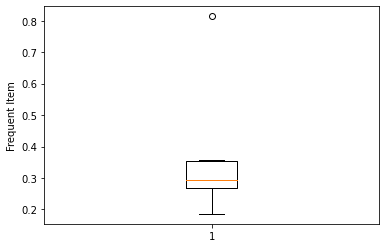

No handles with labels found to put in legend.


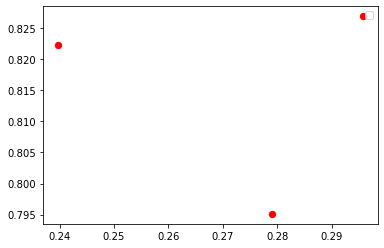

In [5]:
import json
import matplotlib.pyplot as plt

#结果可视化
with open("F:\\DMResults\\frequent_item.json") as f1:
    freq = [json.loads(each) for each in f1.readlines()]

with open("F:\\DMResults\\related_rule.json") as f2:
    rules = [json.loads(each) for each in f2.readlines()]

freq_sup = [each["sup"] for each in freq]
plt.boxplot(freq_sup)
plt.ylabel("Frequent Item")
plt.show()

rules_sup = [each["sup"] for each in rules]
rules_conf = [each["conf"] for each in rules]


plt.scatter(rules_sup, rules_conf, marker='o', color='red', s=40,)
plt.xlabel = 'Sup'
plt.ylabel = 'Conf'
plt.legend(loc='best')
plt.show()
